In [1]:
import os
from pathlib import Path
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
resultsfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial'/ 'USHistoryResults')

cwd=os.getcwd()
print(os.getcwd())

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\dev


In [2]:
PV_ICE.__version__

''

In [3]:
MATERIALS = ['glass']#,'aluminium_frames','silver','silicon', 'copper', 'encapsulant', 'backsheet']
moduleFile = os.path.join(baselinesfolder, 'TEST_baseline_modules_mass_US.csv')
#newmodfilesPAth = os.path.join(supportMatfolder,'Calculations-Installs-Subset-CommUtility.xlsx')

In [4]:
r1 = PV_ICE.Simulation(name='sim1', path=testfolder)
r1.createScenario(name='test', massmodulefile=moduleFile) #create the scenario, name and mod file attach
for mat in MATERIALS:
    materialfile = os.path.join(baselinesfolder, 'baseline_material_mass_'+str(mat)+'.csv')
    r1.scenario['test'].addMaterial(mat, massmatfile=materialfile) # add all materials listed in MATERIALS

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv', 'baseline_modules_energy_CdTe.csv']


In [5]:
r1.calculateMassFlow()

>>>> Calculating Material Flows <<<<

Working on Scenario:  test
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [6]:
usyearlyr1, uscumr1 = r1.aggregateResults()

In [7]:
r1.scenario['test'].dataOut_m.keys()

Index(['Area', 'Cumulative_Active_Area', 'EOL_BadStatus', 'EOL_Landfill0',
       'EOL_PATHS', 'EOL_PG', 'Effective_Capacity_[W]', 'Landfill_0_ProjLife',
       'MerchantTail_Area', 'MerchantTail_[W]', 'ModuleTotal_MFG', 'P2_stored',
       'P3_reMFG', 'P4_recycled', 'PB1_landfill', 'PB2_stored', 'PB3_reMFG',
       'PB3_reMFG_unyield', 'PB3_reMFG_yield', 'PB4_recycled', 'PG1_landfill',
       'PG2_stored', 'PG3_reMFG', 'PG3_reMFG_unyield', 'PG3_reMFG_yield',
       'PG4_recycled', 'Power_Degraded_[W]', 'Repaired_Area', 'Repaired_[W]',
       'Resold_Area', 'Resold_[W]', 'WeibullParams',
       'Yearly_Sum_Area_EOLby_Degradation', 'Yearly_Sum_Area_EOLby_Failure',
       'Yearly_Sum_Area_EOLby_ProjectLifetime', 'Yearly_Sum_Area_PathsBad',
       'Yearly_Sum_Area_PathsGood', 'Yearly_Sum_Area_atEOL',
       'Yearly_Sum_Power_EOLby_Degradation', 'Yearly_Sum_Power_EOLby_Failure',
       'Yearly_Sum_Power_EOLby_ProjectLifetime', 'Yearly_Sum_Power_PathsBad',
       'Yearly_Sum_Power_PathsGood

In [8]:
'Yearly_Sum_Power_EOLby_Degradation',
'Yearly_Sum_Power_EOLby_Failure',
'Yearly_Sum_Power_EOLby_ProjectLifetime',
'Yearly_Sum_Power_PathsBad',
'Yearly_Sum_Power_PathsGood',
'Yearly_Sum_Power_atEOL'

'Yearly_Sum_Power_atEOL'

In [9]:
yspeol_deg = r1.scenario['test'].dataOut_m['Yearly_Sum_Power_EOLby_Degradation']

In [10]:
yspeol_fail =r1.scenario['test'].dataOut_m['Yearly_Sum_Power_EOLby_Failure']

In [11]:
yspeol_plife =r1.scenario['test'].dataOut_m['Yearly_Sum_Power_EOLby_ProjectLifetime']

In [12]:
yspeol_sum =r1.scenario['test'].dataOut_m['Yearly_Sum_Power_atEOL']

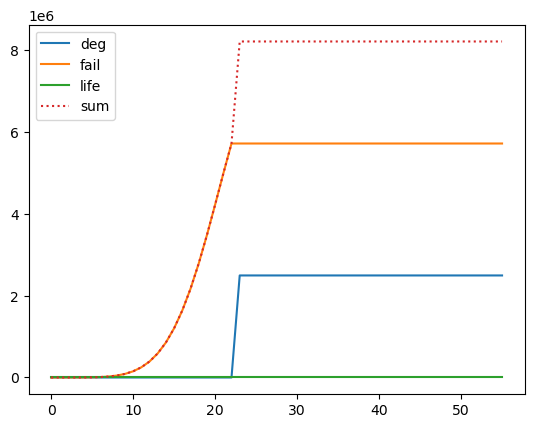

In [13]:
plt.plot(yspeol_deg, label='deg')
plt.plot(yspeol_fail, label='fail')
plt.plot(yspeol_plife, label='life')
plt.plot(yspeol_sum, ls=':', label='sum')
plt.legend()

In [14]:
yspeol = pd.concat([yspeol_deg,yspeol_fail,yspeol_plife,yspeol_sum],axis=1)
yspeol

,Yearly_Sum_Power_EOLby_Degradation,Yearly_Sum_Power_EOLby_Failure,Yearly_Sum_Power_EOLby_ProjectLifetime,Yearly_Sum_Power_atEOL
0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1,0.000000e+00,6.866359e-01,0.0,6.866359e-01
2,0.000000e+00,2.831734e+01,0.0,2.831734e+01
3,0.000000e+00,2.485886e+02,0.0,2.485886e+02
4,0.000000e+00,1.158294e+03,0.0,1.158294e+03
5,0.000000e+00,3.813970e+03,0.0,3.813970e+03
6,0.000000e+00,1.008092e+04,0.0,1.008092e+04
7,0.000000e+00,2.289102e+04,0.0,2.289102e+04
8,0.000000e+00,4.649511e+04,0.0,4.649511e+04
9,0.000000e+00,8.668822e+04,0.0,8.668822e+04


In [15]:
yspeol_MW = yspeol/1000000#), index = usyearlyr1.index)
yspeol_MW_cumu = yspeol_MW.cumsum()
yspeol_MW_cumu.index = usyearlyr1.index
#yspeol_MW_cumu
decomm_cap = usyearlyr1.filter(like='Decomm')
compare_decom = pd.concat([yspeol_MW_cumu,decomm_cap],axis=1)
compare_decom.tail()

,Yearly_Sum_Power_EOLby_Degradation,Yearly_Sum_Power_EOLby_Failure,Yearly_Sum_Power_EOLby_ProjectLifetime,Yearly_Sum_Power_atEOL,DecommisionedCapacity_sim1_test_[MW]
year,,,,,
2046,72.328234,194.476022,0.0,266.804256,341.370469
2047,74.822311,200.195649,0.0,275.017960,351.370469
2048,77.316388,205.915277,0.0,283.231665,361.370469
2049,79.810465,211.634905,0.0,291.445370,371.370469
2050,82.304542,217.354532,0.0,299.659074,381.370469


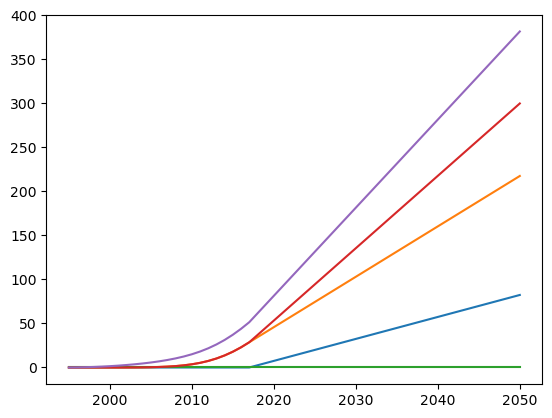

In [16]:
plt.plot(compare_decom)

In [17]:
decomm_cap.diff()

,DecommisionedCapacity_sim1_test_[MW]
year,
1995,NaN
1996,0.100001
1997,0.199028
1998,0.297258
1999,0.395195
2000,0.493899
2001,0.595227
2002,0.702085
2003,0.818668


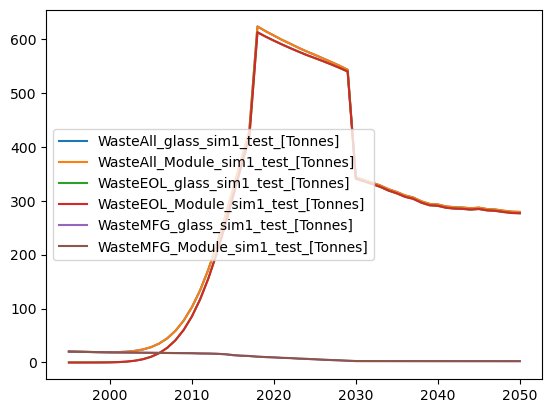

In [18]:
plt.plot(usyearlyr1.filter(like='Waste'))
plt.legend(usyearlyr1.filter(like='Waste').keys())

In [19]:
usyearlyr1.filter(like='Waste')

,WasteAll_glass_sim1_test_[Tonnes],WasteAll_Module_sim1_test_[Tonnes],WasteEOL_glass_sim1_test_[Tonnes],WasteEOL_Module_sim1_test_[Tonnes],WasteMFG_glass_sim1_test_[Tonnes],WasteMFG_Module_sim1_test_[Tonnes]
year,,,,,,
1995,20.210526,20.210526,0.000000,0.000000,20.210526,20.210526
1996,19.892295,19.892295,0.000044,0.000044,19.892250,19.892250
1997,19.616101,19.616101,0.001848,0.001848,19.614253,19.614253
1998,19.360267,19.360267,0.016348,0.016348,19.343919,19.343919
1999,19.157638,19.157638,0.076703,0.076703,19.080935,19.080935
2000,19.079252,19.079252,0.254246,0.254246,18.825006,18.825006
2001,19.252246,19.252246,0.676395,0.676395,18.575851,18.575851
2002,19.956205,19.956205,1.545806,1.545806,18.410398,18.410398
2003,21.407715,21.407715,3.159848,3.159848,18.247867,18.247867
